In [24]:
import numpy as np
import pandas as pd
import material as ml
import matplotlib.pyplot as plt

In [36]:
path_SiN = './refractiveINFO/Vogt-1.91.csv'
SiN_INFO = pd.read_csv(path_SiN)
SiN_n = [float(i) for i in SiN_INFO[0:146]['n']]
SiN_w = [float(i) for i in SiN_INFO[0:146]['wl']]
SiN_k = [float(i) for i in SiN_INFO[147:]['n']]
SiN_wk = [float(i) for i in SiN_INFO[147:]['wl']]
x = np.linspace(0.25, 1.7, 146)
SiN = ml.Material(x, SiN_n, SiN_k)
#ml.save_material(SiN, 'SiN_INFO')

./material/book.csv has saved successfully
./material/data.csv has saved successfully
./material/data.csv has saved successfully
./material/data.csv has saved successfully
./material/data.csv has saved successfully


In [54]:
path_ITO = './refractiveINFO/konig.csv'
ITO_INFO = pd.read_csv(path_ITO)
ITO_n = [float(i) for i in ITO_INFO[0:474]['n']]
ITO_w = [float(i) for i in ITO_INFO[0:474]['wl']]
ITO_k = [float(i) for i in ITO_INFO[475:]['n']]
ITO_wk = [float(i) for i in ITO_INFO[475:]['wl']]
ITO = ml.Material(ITO_w, ITO_n, ITO_k, ITO_wk)
#ml.save_material(ITO, 'ITO_INFO')

./material/book.csv has saved successfully
./material/data.csv has saved successfully
./material/data.csv has saved successfully
./material/data.csv has saved successfully
./material/data.csv has saved successfully


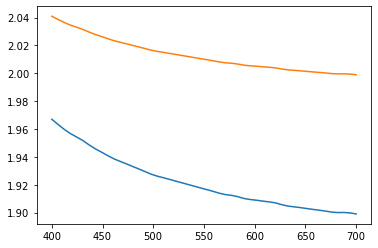

In [70]:
wl = np.linspace(400, 700)
a = 21/34
b = 0.82609
SN = SiN.nvalues(wl)
SiN_LENS = [x*a + b for x in SN]
plt.plot(wl, SN)
plt.plot(wl, SiN_LENS)
plt.show()

In [72]:
SiN_th = ml.sellmeier_fitting(wl, SiN_LENS)

requested number of basinhopping iterations completed successfully


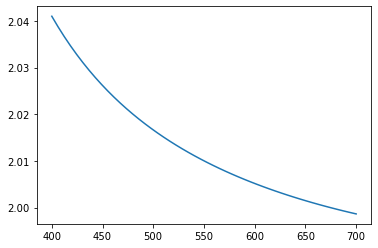

In [87]:
SiN_LENs = ml.Sellmeier(SiN_th)
plt.plot(wl, SiN_LENs.nvalues(wl))
plt.show()
SiN_LENs.k = 0
#ml.save_material(SiN_LENs, 'SiN_LENS')

In [ ]:
IN = ITO.nvalues(wl)
x1 = min(IN)
x2 = max(IN)
y1 = 1.743
y2 = 1.957

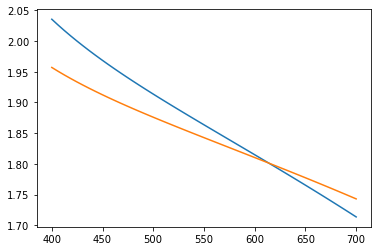

In [103]:
def solve(x1, x2, y1, y2):
    a = (y2-y1)/(x2-x1)
    b = (x2*y1 - x1*y2)/(x2-x1)
    return a, b

ITO_LENs = [x*a + b for x in IN]
plt.plot(wl, IN)
plt.plot(wl, ITO_LENs)
plt.show()

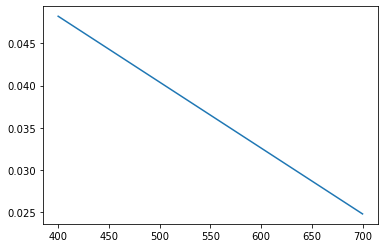

In [108]:
ka, kb = solve(400, 700, 0.0482, 0.0248)
ITOk = [x*ka+kb for x in wl]
plt.plot(wl, ITOk)
plt.show()

In [99]:
ITO_th = ml.sellmeier_fitting(wl, ITO_LENs)

requested number of basinhopping iterations completed successfully


In [ ]:
ITO_LENS = ml.Sellmeier(ITO_th, ITOk, wl)
plt.plot(wl, ITO_LENS.nvalues(wl))
plt.show()

In [113]:
ml.save_material(ITO_LENS, 'ITO_LENS')

./material/book.csv has saved successfully
./material/data.csv has saved successfully
./material/data.csv has saved successfully
./material/data.csv has saved successfully


In [140]:
path_SiO2 = './refractiveINFO/Malitson.csv'
SiO2_INFO = pd.read_csv(path_SiO2)
SiO2_n = [float(i) for i in SiO2_INFO[0:]['n']]
SiO2_w = [float(i) for i in SiO2_INFO[0:]['wl']]
SiO2 = ml.Material(SiO2_w, SiO2_n)
wl = np.linspace(400, 700)
SiO2n = SiO2.nvalues(wl)

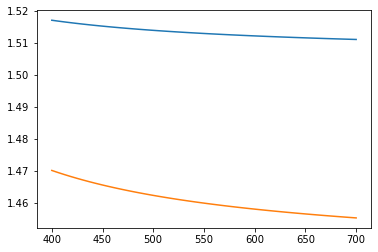

In [144]:
x1 = min(SiO2n)
x2 = max(SiO2n)
y1 = 1.511
y2 = 1.517
sa, sb = solve(x1, x2, y1, y2)
SiO2_LENs = [x*sa+sb for x in SiO2n]
plt.plot(wl, SiO2_LENs)
plt.plot(wl, SiO2n)
plt.show()

In [145]:
SiO2_th = ml.sellmeier_fitting(wl, SiO2_LENs)

requested number of basinhopping iterations completed successfully


In [149]:
SiO2_LENS = ml.Sellmeier(SiO2_th)

Data already exist, set cover = True to overwrite the previous data


UnboundLocalError: local variable 'new_file' referenced before assignment

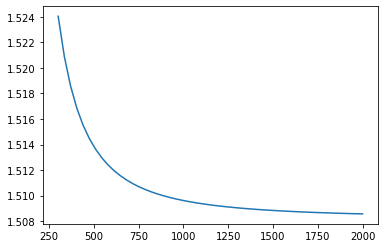

In [147]:
wl = np.linspace(300, 2000)
plt.plot(wl, SiO2_LENS.nvalues(wl))
plt.show()

In [153]:
SiO2_test = ml.open_material('SiO2_LENS', 'Sellmeier')
SiO2_test.nvalues(wl)

array([1.52403617, 1.52086971, 1.51857094, 1.51684847, 1.51552404,
       1.51448352, 1.51365101, 1.51297445, 1.51241711, 1.51195249,
       1.51156109, 1.51122827, 1.51094288, 1.51069632, 1.51048183,
       1.51029408, 1.51012881, 1.50998255, 1.50985251, 1.50973636,
       1.50963219, 1.50953841, 1.50945368, 1.50937688, 1.50930704,
       1.50924334, 1.50918509, 1.50913169, 1.5090826 , 1.50903738,
       1.50899562, 1.508957  , 1.50892119, 1.50888793, 1.50885699,
       1.50882815, 1.50880123, 1.50877606, 1.5087525 , 1.5087304 ,
       1.50870966, 1.50869016, 1.5086718 , 1.5086545 , 1.50863817,
       1.50862275, 1.50860817, 1.50859437, 1.5085813 , 1.5085689 ])